In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline

# =======================
# Task 1: Data Cleaning
# =======================
# Load dataset
file_path = "/content/drive/MyDrive/dataset/Cardiotocographic.csv"
df = pd.read_csv(file_path)
print("Initial Shape:", df.shape)
display(df.head())
display(df.info())

# Handle missing values
# Numeric -> fill with median, Categorical -> fill with mode
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values after imputation:\n", df.isnull().sum())

# Detect & treat outliers (IQR method)
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df_no_outliers = df.copy()
for col in num_cols:
    df_no_outliers = remove_outliers(df_no_outliers, col)

print("Shape after outlier removal:", df_no_outliers.shape)

Initial Shape: (2126, 14)


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


None

Missing values after imputation:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
Shape after outlier removal: (917, 14)


/tmp/ipython-input-3200723334.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [7]:
# =======================
# Task 2: Statistical Summary
# =======================
print("\n--- Statistical Summary ---")
summary = df.describe().T
summary["median"] = df.median(numeric_only=True)
summary["IQR"] = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)
display(summary)

# Highlight interesting findings
print("\nInteresting Findings:")
for col in num_cols:
    if summary.loc[col, "std"] > summary.loc[col, "mean"]:
        print(f"- {col}: High variability (std > mean)")
    if summary.loc[col, "mean"] > summary.loc[col, "50%"]:
        print(f"- {col}: Right-skewed distribution")


--- Statistical Summary ---


,count,mean,std,min,25%,50%,75%,max,median,IQR
LB,2126.0,133.340204,11.214379,51.842487,126.000000,133.000000,140.000000,214.000000,133.000000,14.000000
AC,2126.0,0.003204,0.004373,-0.019284,0.000000,0.001634,0.005606,0.038567,0.001634,0.005606
FM,2126.0,0.009894,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.000000,0.002567
UC,2126.0,0.004391,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004484,0.004685
DL,2126.0,0.001895,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.000000,0.003289
DS,2126.0,0.000002,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000,0.000000
DP,2126.0,0.000173,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000,0.000000
ASTV,2126.0,46.995984,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,49.000000,29.000000
MSTV,2126.0,1.364378,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.200000,1.000000
ALTV,2126.0,10.285964,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,0.000000,11.000000



Interesting Findings:
- LB: Right-skewed distribution
- AC: High variability (std > mean)
- AC: Right-skewed distribution
- FM: High variability (std > mean)
- FM: Right-skewed distribution
- DL: High variability (std > mean)
- DL: Right-skewed distribution
- DS: High variability (std > mean)
- DS: Right-skewed distribution
- DP: High variability (std > mean)
- DP: Right-skewed distribution
- MSTV: Right-skewed distribution
- ALTV: High variability (std > mean)
- ALTV: Right-skewed distribution
- MLTV: Right-skewed distribution
- Width: Right-skewed distribution
- Tendency: High variability (std > mean)
- Tendency: Right-skewed distribution
- NSP: Right-skewed distribution


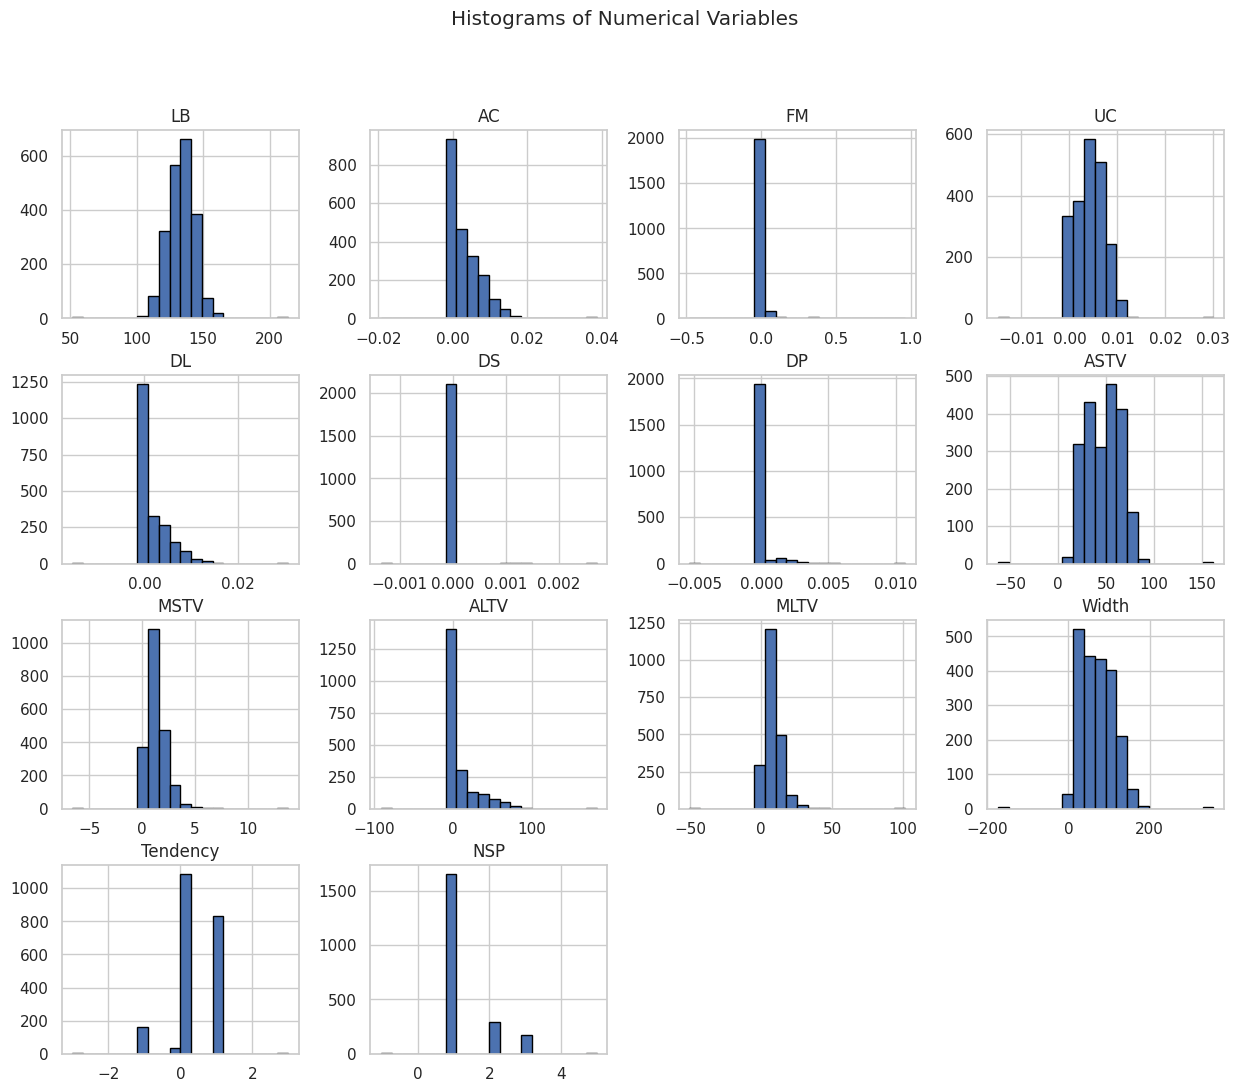

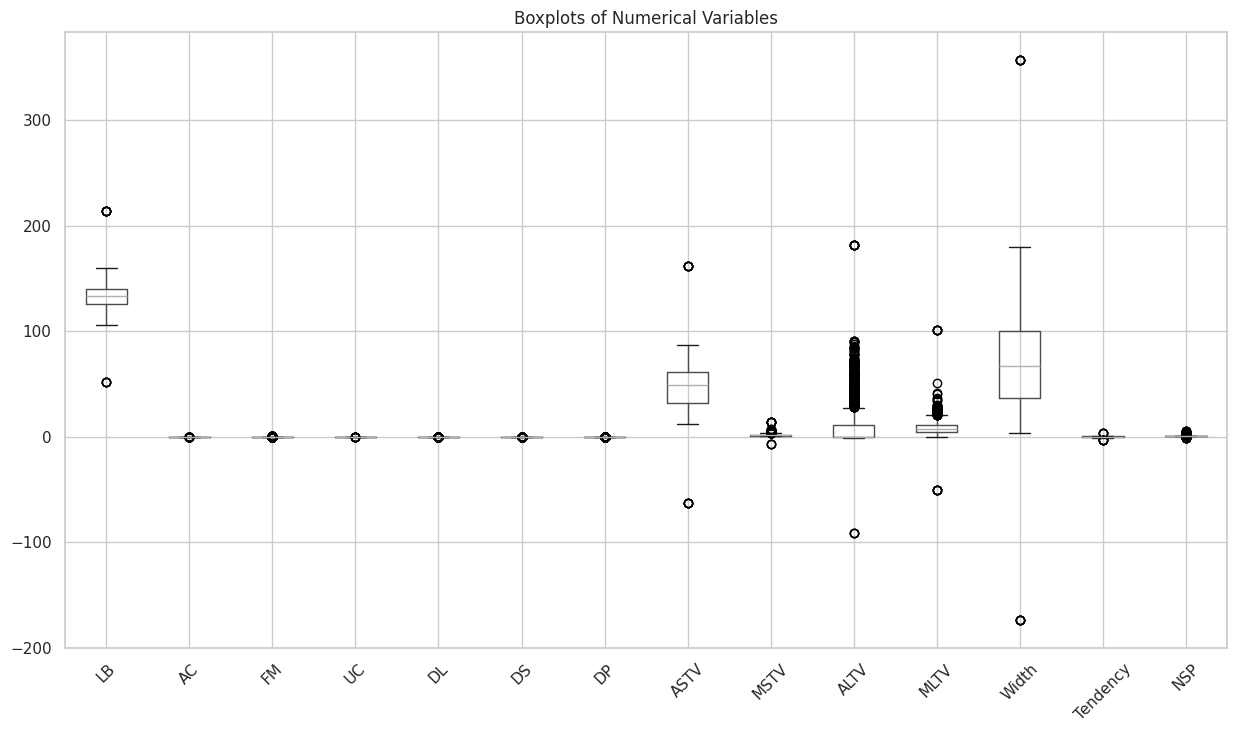

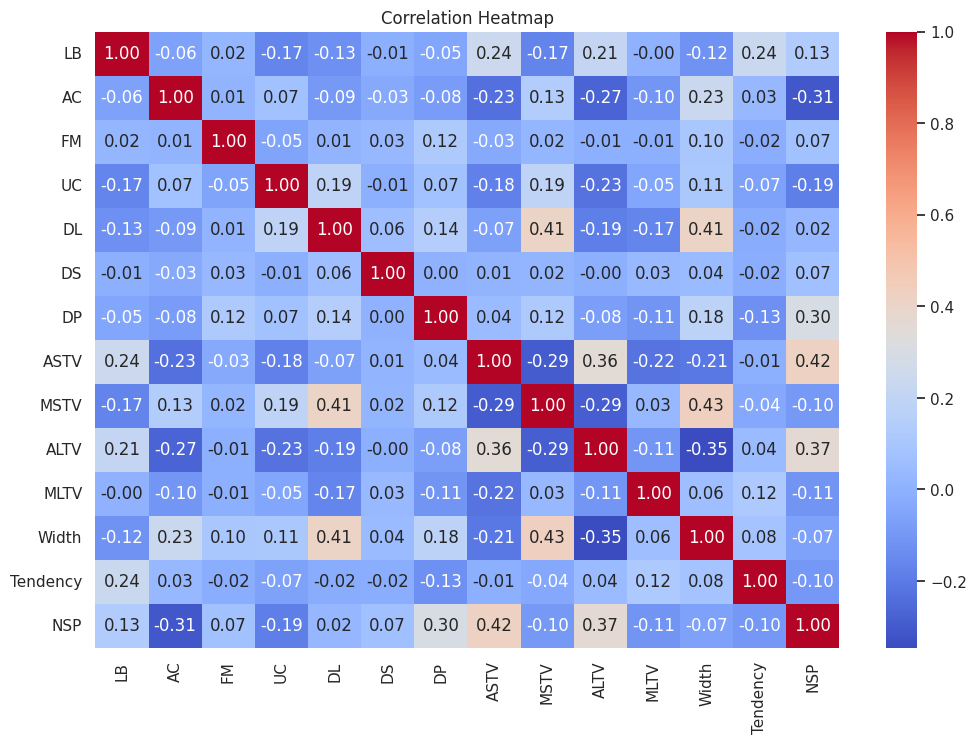

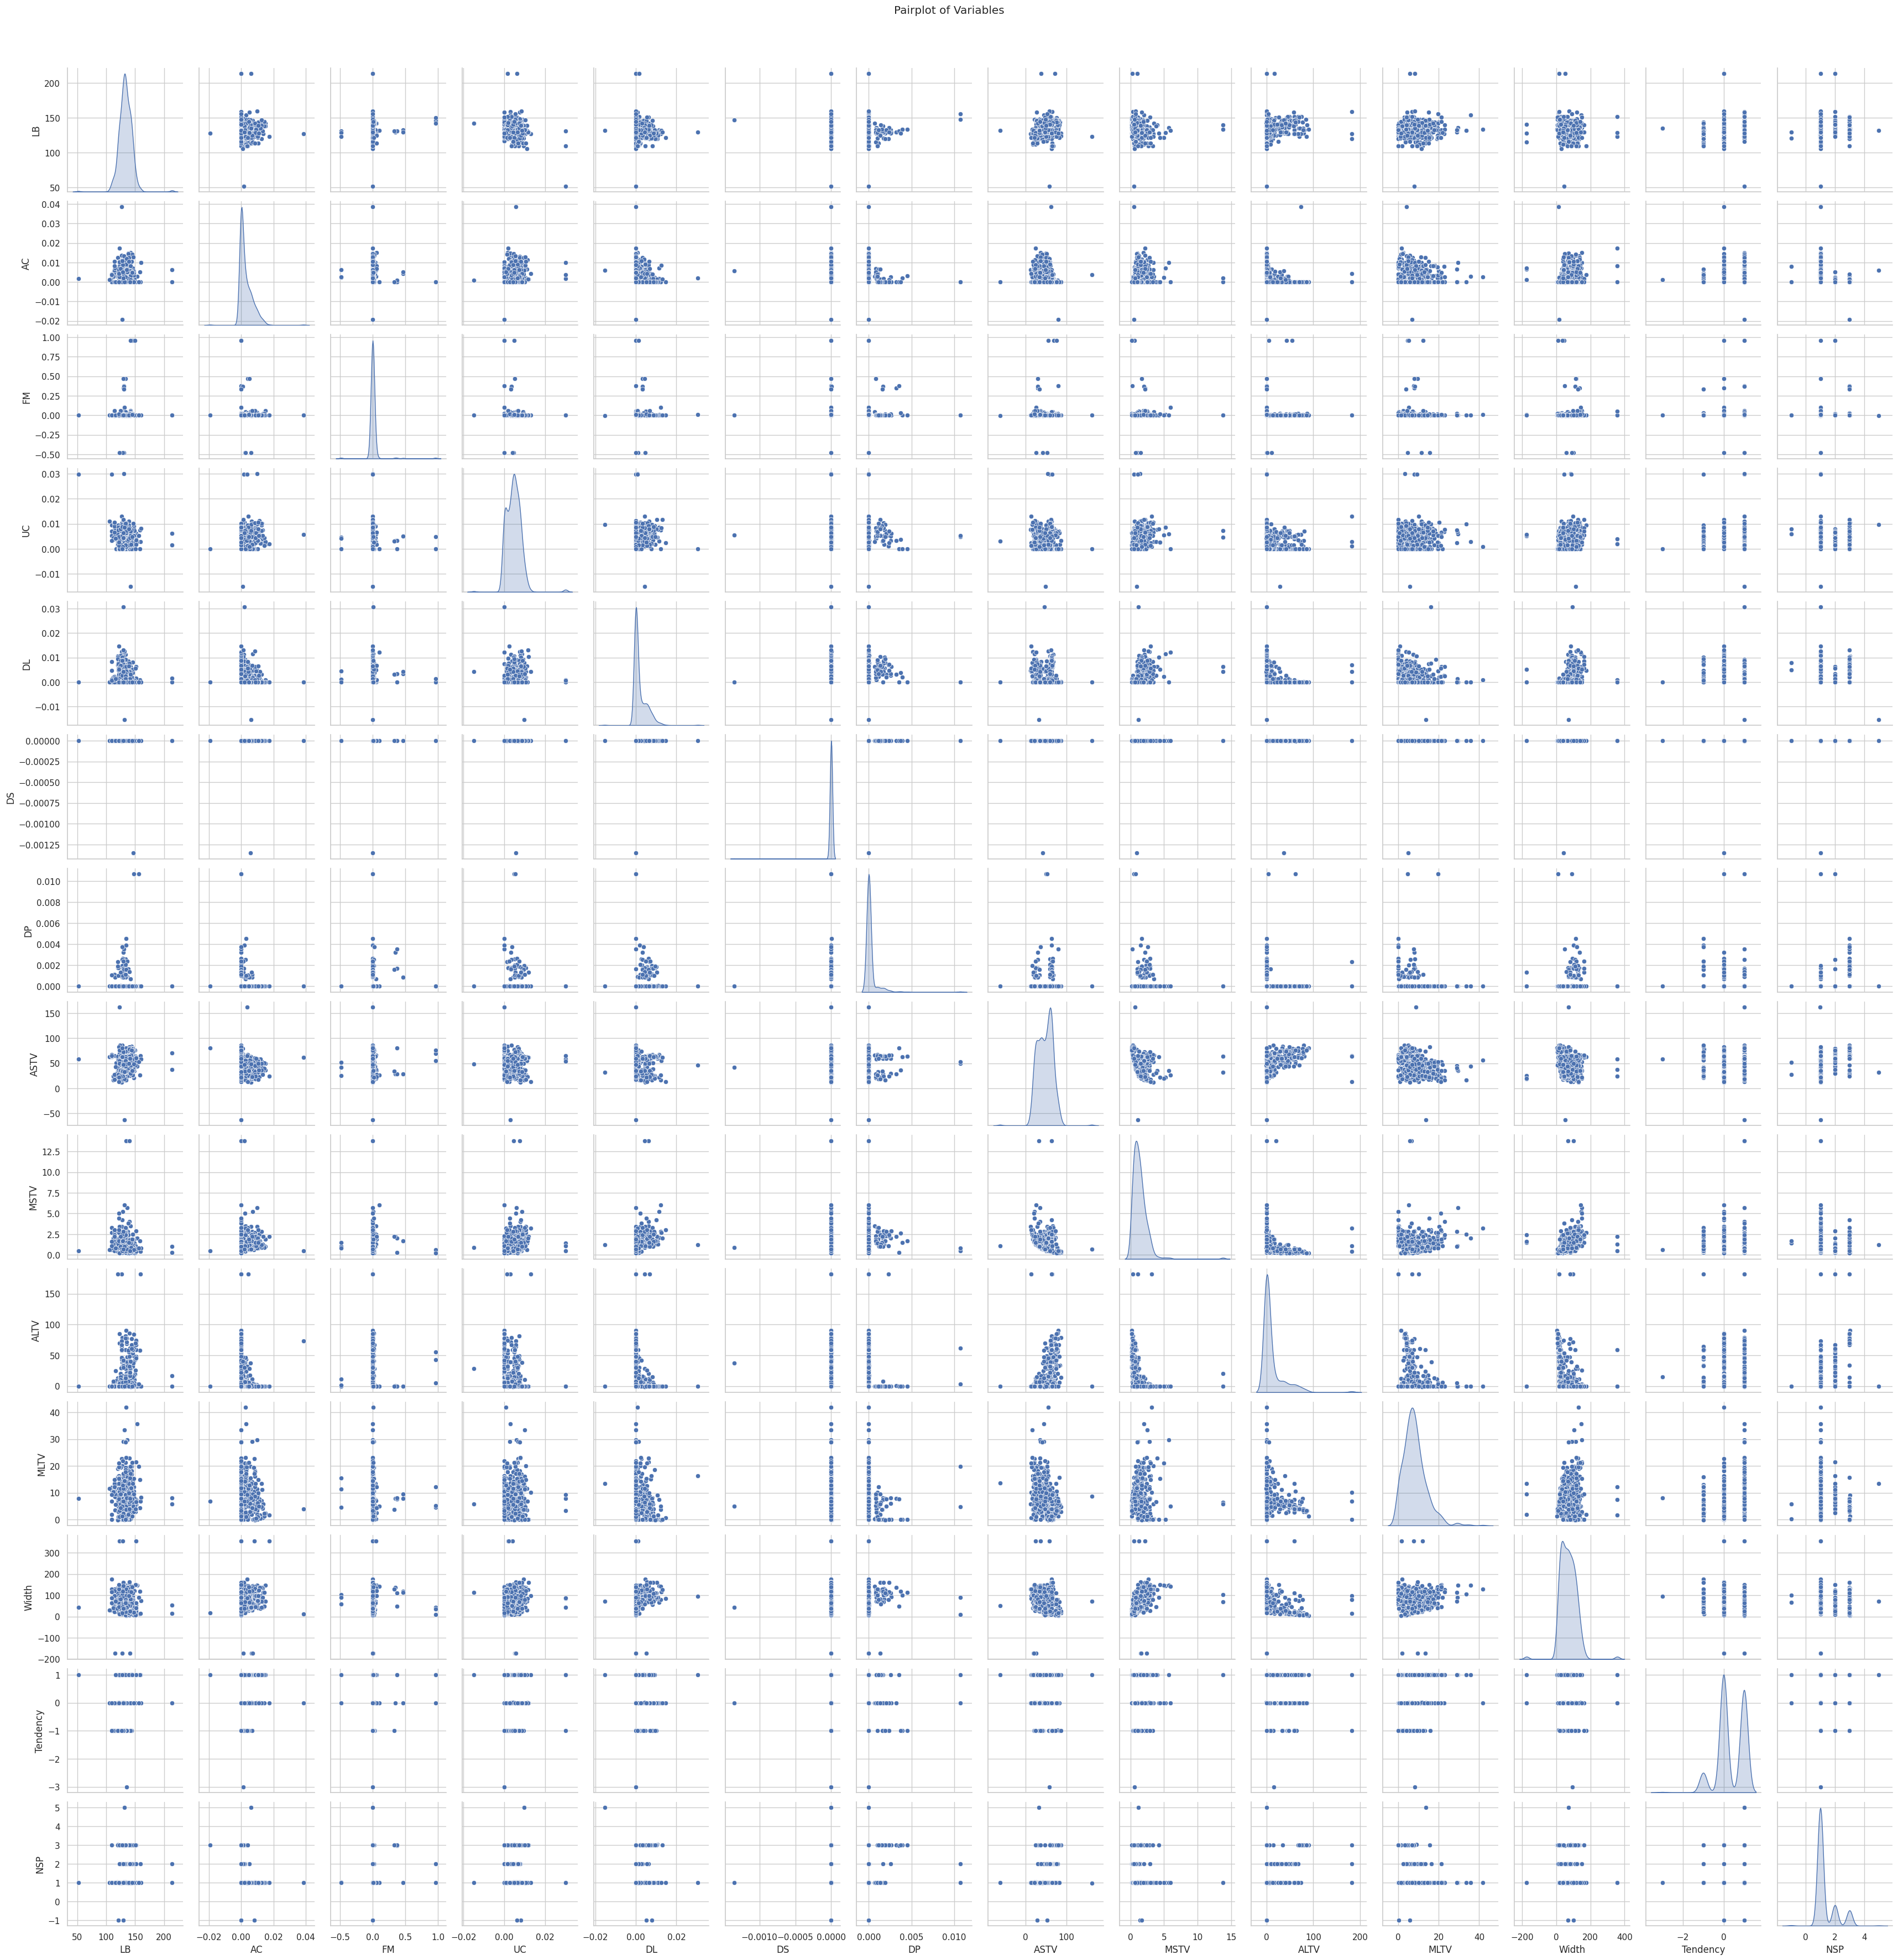

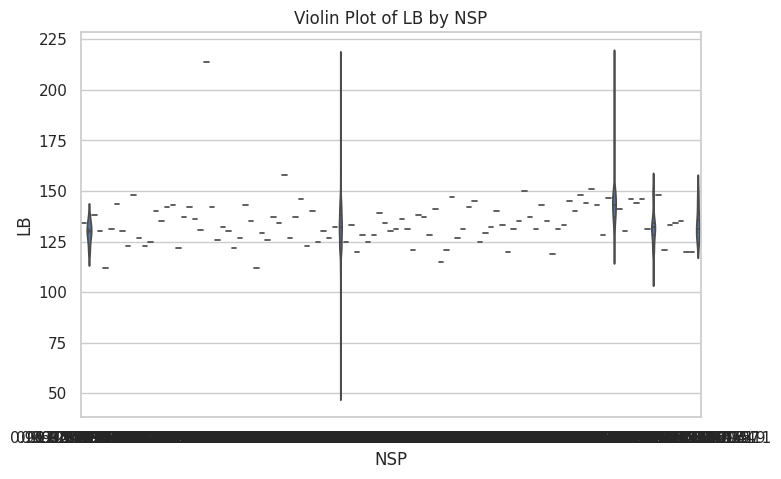

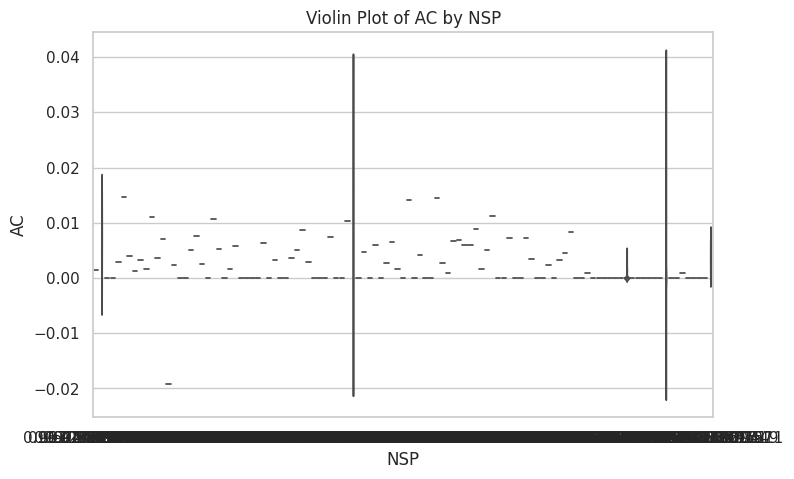

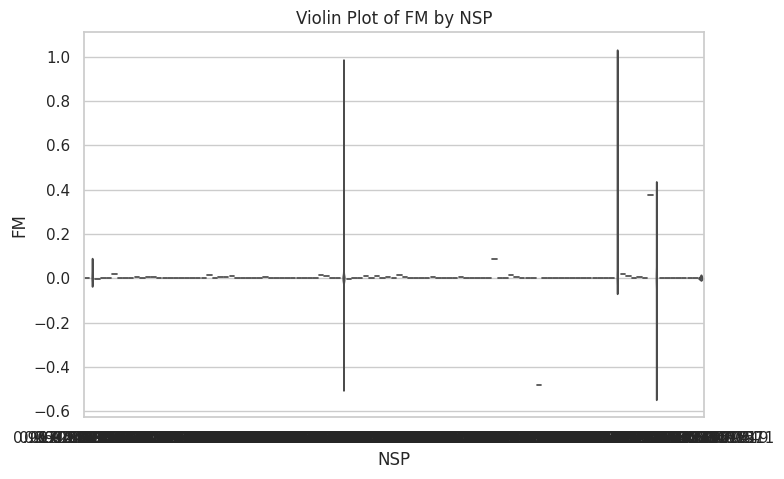

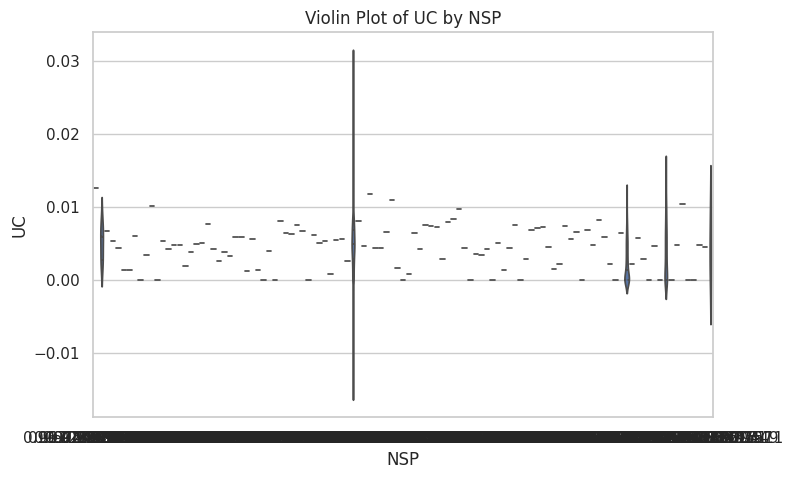

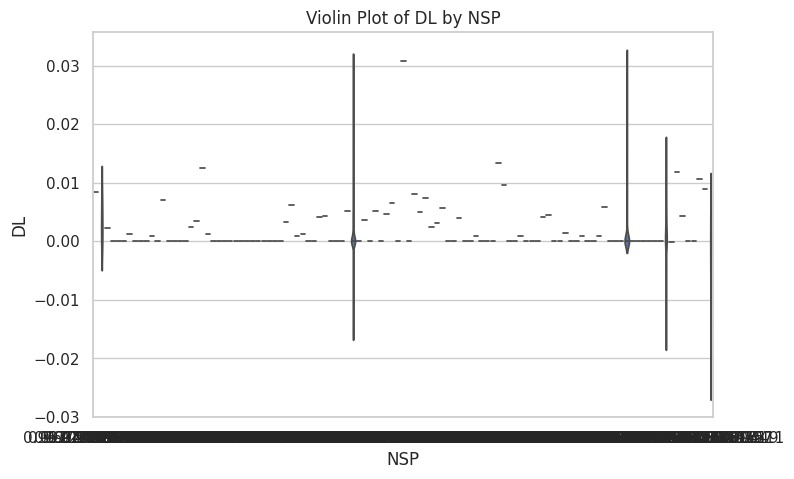

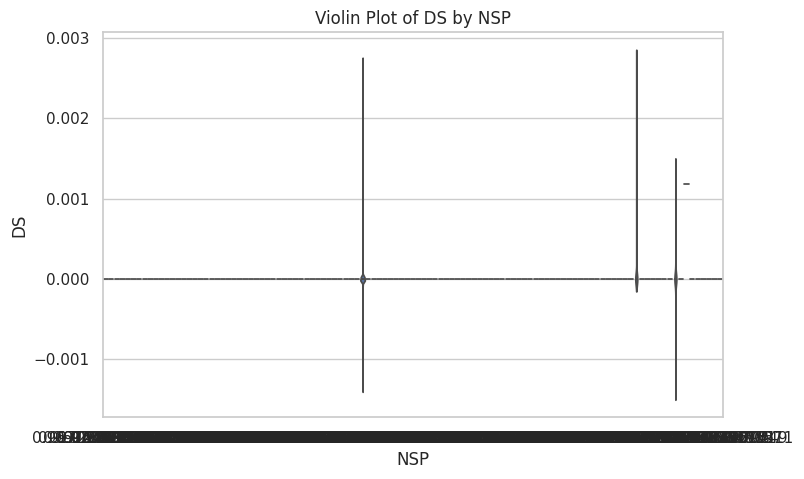

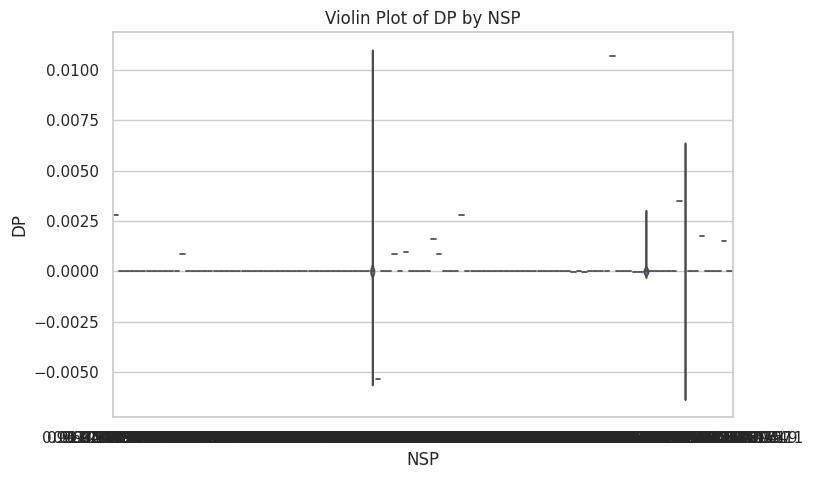

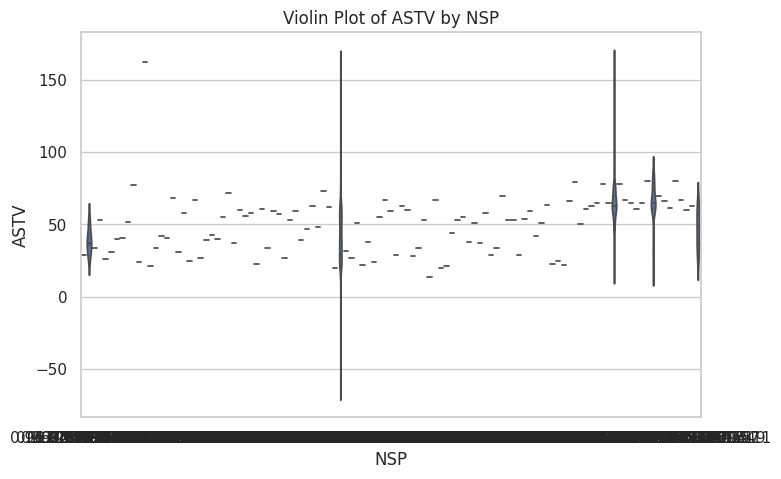

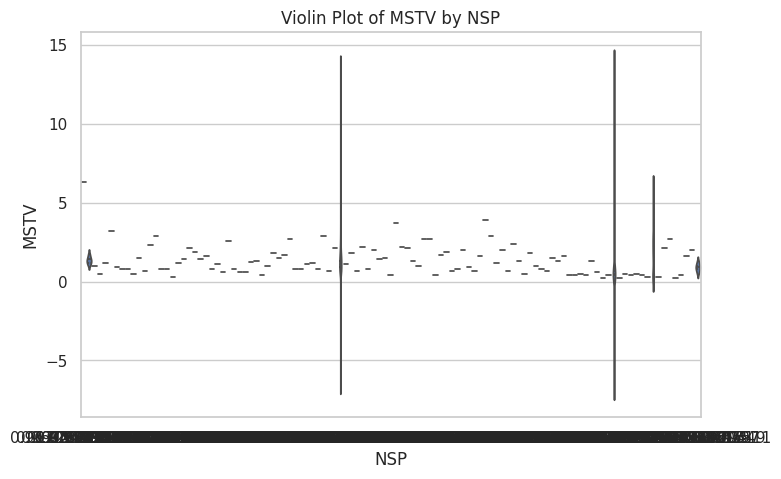

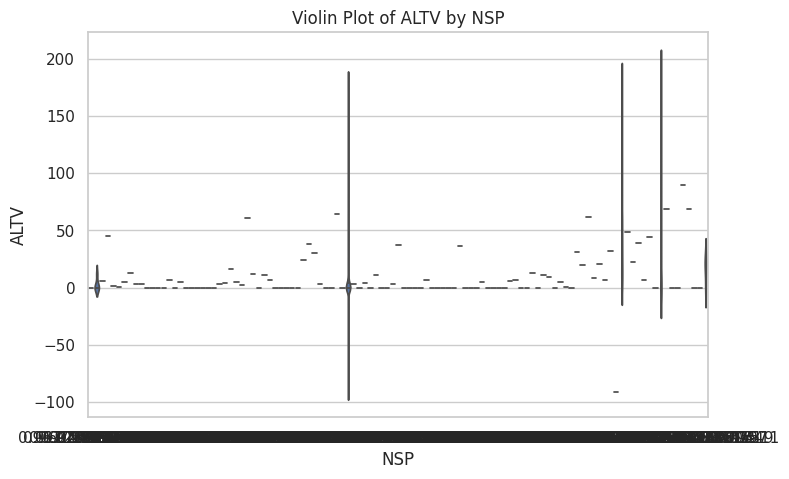

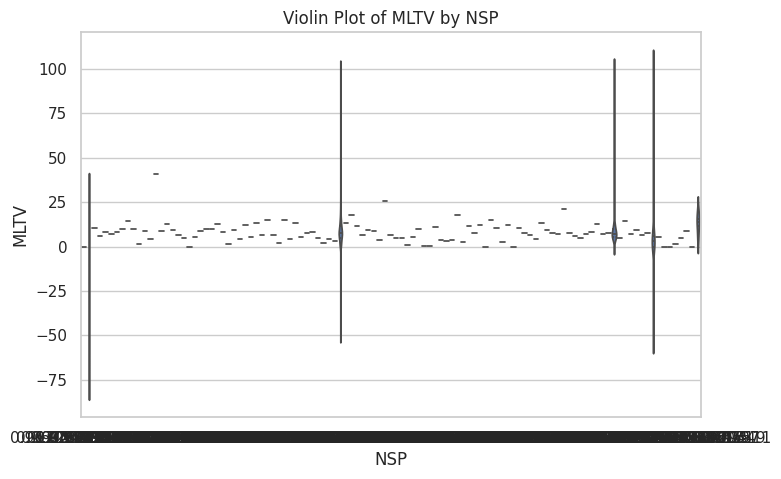

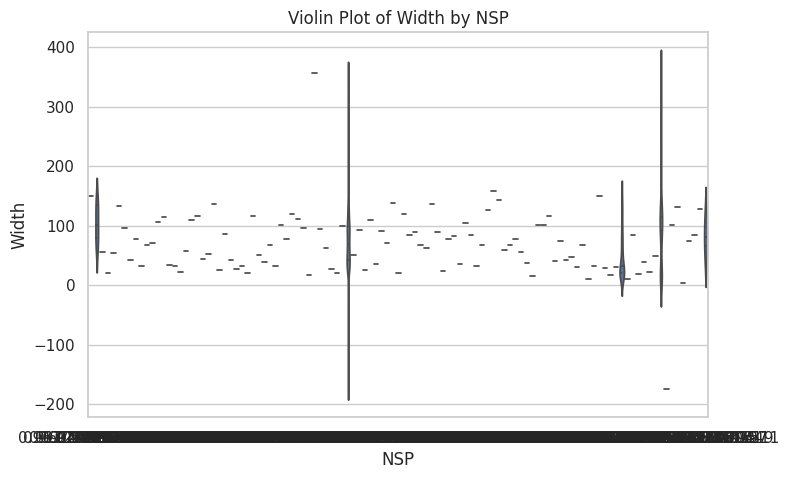

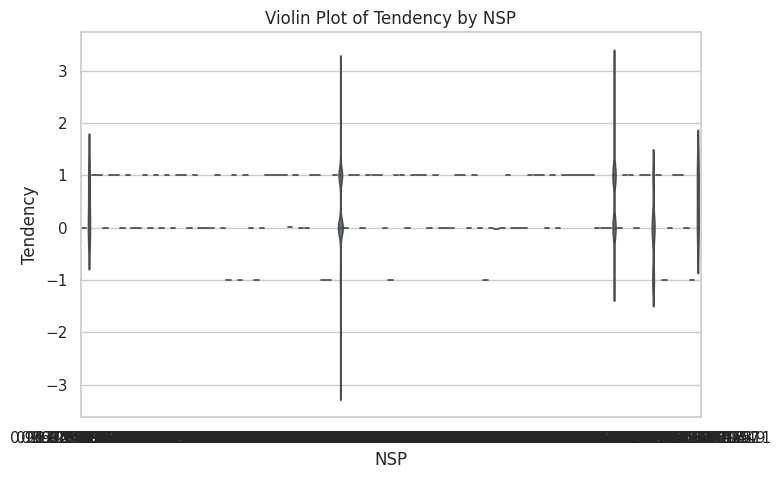

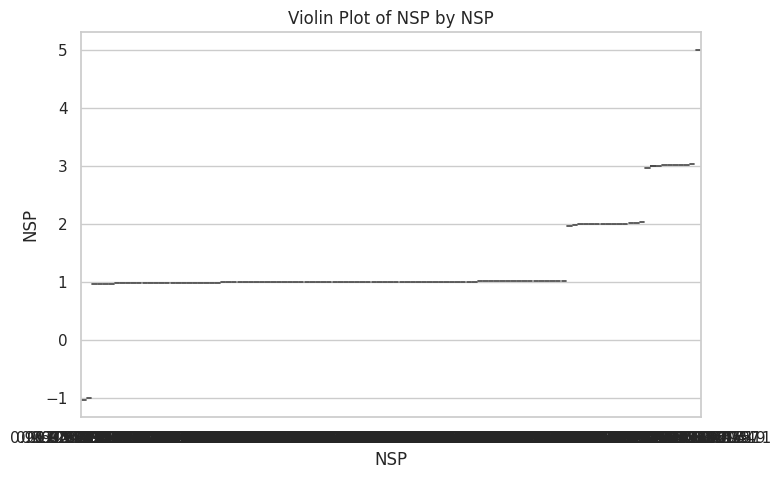

In [8]:
# =======================
# Task 3: Data Visualization
# =======================

# 3.1 Histograms
df[num_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle("Histograms of Numerical Variables")
plt.show()

# 3.2 Boxplots
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

# 3.3 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3.4 Pairplot (sampled for performance)
sns.pairplot(df.sample(min(500, len(df))), diag_kind="kde")
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

# 3.5 Violin Plots (if dataset has label column)
if 'NSP' in df.columns:
    for col in num_cols:
        plt.figure(figsize=(8, 5))
        sns.violinplot(x="NSP", y=col, data=df, inner="quartile")
        plt.title(f"Violin Plot of {col} by NSP")
        plt.show()

In [10]:
# =======================
# Task 4: Pattern Recognition
# =======================
corr = df.corr()
strong_corr = corr[(corr.abs() > 0.6) & (corr.abs() < 1.0)]

print("\n--- Strong Correlations (|r| > 0.6) ---")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# Scatter plots for strong correlations
for col1 in num_cols:
    for col2 in num_cols:
        if col1 != col2 and abs(corr.loc[col1, col2]) > 0.6:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
            plt.title(f"Scatter: {col1} vs {col2} (r={corr.loc[col1,col2]:.2f})")
            plt.show()


--- Strong Correlations (|r| > 0.6) ---
Empty DataFrame
Columns: []
Index: []


In [11]:
# =======================
# Task 5: Conclusion
# =======================
print("\n=== Conclusion ===")
print("1. Dataset cleaned, missing values imputed, and outliers treated.")
print("2. Statistical summary revealed high variability in some variables.")
print("3. Visualizations show distribution shapes, correlations, and potential clusters.")
print("4. Strong correlations found between some fetal monitoring measures.")
print("5. Insights could assist in identifying fetal health conditions and risk factors.")


=== Conclusion ===
1. Dataset cleaned, missing values imputed, and outliers treated.
2. Statistical summary revealed high variability in some variables.
3. Visualizations show distribution shapes, correlations, and potential clusters.
4. Strong correlations found between some fetal monitoring measures.
5. Insights could assist in identifying fetal health conditions and risk factors.
